In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from zipfile import ZipFile

In [3]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall('data')

In [10]:
df_train = pd.read_csv(r'data/train.csv') #將資料變成dataframe
df_test  = pd.read_csv(r'data/test.csv')
print(df_train) #印出資料查看資料內容

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [11]:
#先看看基本資料們
print(df_train.shape) #查看trian的形狀，以方便後來訂定神經網路的輸入層
print(df_test.shape)  #查看test形狀
print('*'*50)
print(df_train.dtypes) #看一下訓練資料的各個欄位的型態

(1460, 81)
(1459, 80)
**************************************************
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [12]:
df_train.drop("Id",inplace = True,axis=1) #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_test.drop("Id",inplace = True,axis=1)  #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_train.head(5) #.head()可以查看前幾筆資料，括號填入數字

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 相關係數範例

In [13]:
x = np.random.randint(0, 100, 10)
y = 5 * x 
z = np.random.randint(0,100,10)
dataframe = pd.DataFrame({'x':x,'y':y,'z':z})
dataframe

,x,y,z
0,38,190,73
1,93,465,31
2,19,95,52
3,34,170,50
4,73,365,96
5,6,30,88
6,23,115,43
7,30,150,72
8,59,295,62
9,59,295,26


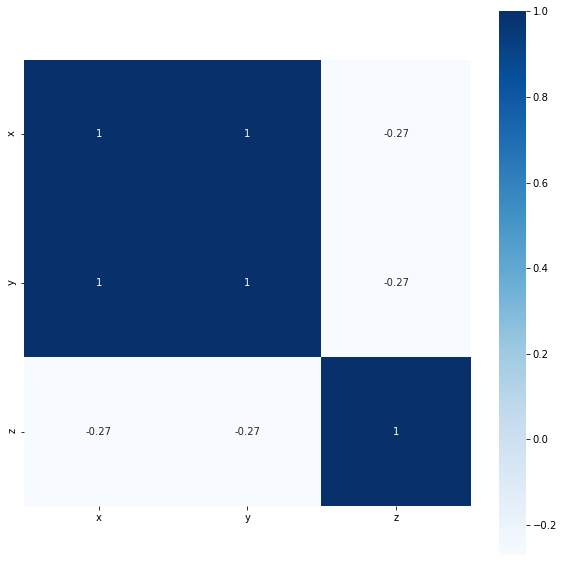

In [15]:
df =dataframe.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()

<AxesSubplot:>

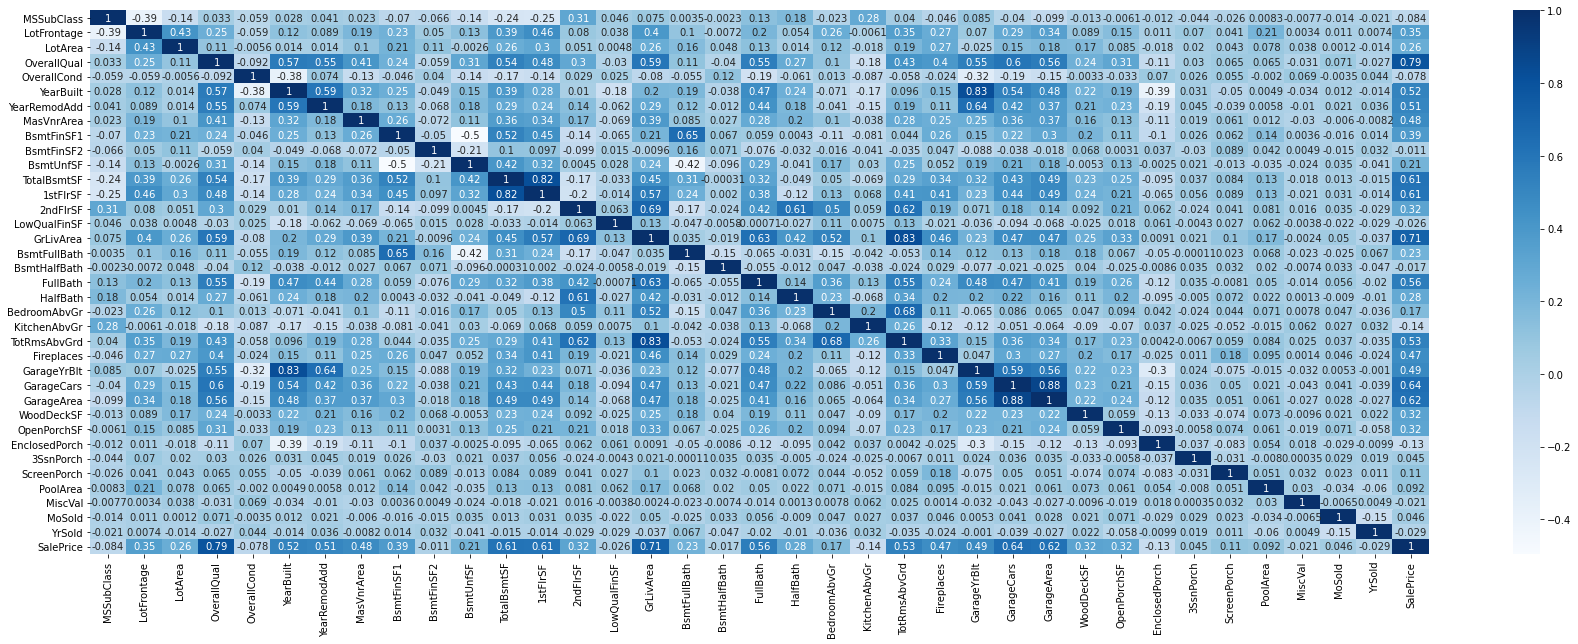

In [16]:
trian_corr =df_train.corr() #計算相關係數
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")

In [17]:
high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.6]
#abs是取絕對值的意思
#abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr) 

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


## 補充相關係數

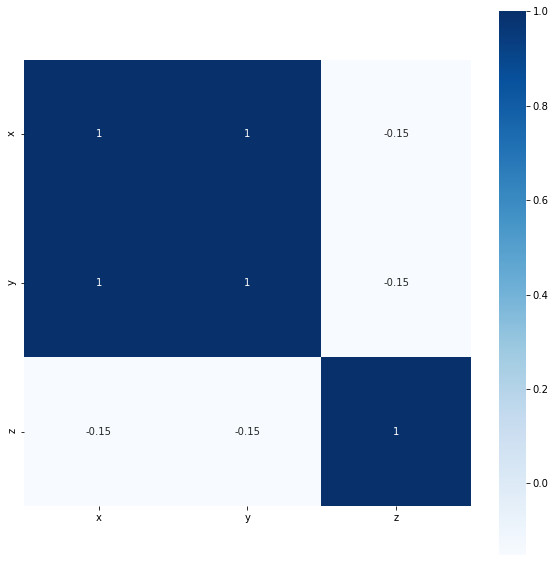

In [18]:
x = np.random.randint(0, 100, 10) #0~100隨機找10筆數據
y = 5 * x 
z = np.random.randint(0,100,10)
l = ['a','b','c','d','e','f','g','h','i','j'] #新增的

dataframe = pd.DataFrame({'x':x,'y':y,'z':z,'l':l})

df =dataframe.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()